# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [2]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [3]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.40251616903711973
rmse median 0.48299649850649023


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [4]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [5]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.11031611250808637
mean error unbiased 0.037964535407232575


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [41]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

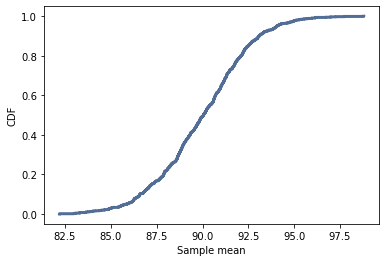

In [7]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [8]:
np.mean(xbars)

89.97943783807482

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [9]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.87190078948085, 94.05835058192999)

And the RMSE of the sample means is called the standard error.

In [10]:
stderr = RMSE(xbars, 90)
stderr

2.5370353559146137

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [11]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.090031225680313
rmse Lm 2.1052064250969833
mean error L 0.31989564028569906
mean error Lm 0.5351700569541369


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [18]:
# Experiment 1 to see if X bar and median are biased estimates of the population mean mu.
# Code below will be modified to create a function for the next estimate:
'''
def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate1()
'''
def Estimate4(n=7, iters=100000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
Estimate4()

Experiment 1
rmse xbar 0.3766724123867106
rmse median 0.4588748674137154
mean error xbar 0.0008365875025395601
mean error median 0.00040772500724027793


In [19]:
# Experiment 2 to see if biased or unbiased variance estimators yield a smaller MSE.
# Modify the code below:
'''
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()
'''
def Estimate5(n=7, iters=100000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))
    
Estimate5()

Experiment 2
RMSE biased 0.5162709803110882
RMSE unbiased 0.5795827537899765


#### Exercise 8-1 Conclusions:
##### Are Xbar and median biased estimates of the mu?
The number of iterations increased from 1000 to 100000 resulting in a decrease in mean error for both xbar and the median. As a result, xbar and median do not appear to be biased. 
##### Check whether S^2 or S_{n-1}^2 yields a lower MSE.
The same increase of iterations was performed for Experiment 2 where the iterations went from 1000 to 100000. At 1000 iterations, the biased estimator results in a lower RMSE value compared to the unbiased estimator. The same results hold true with the iterations at 100000. At 100000 iterations, the biased estimator results in a lower RMSE value compared to the unbiased estimator. 

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



standard error 0.8620529785541251
confidence interval (1.2556274081703205, 3.7184726322658426)


0.8620529785541251

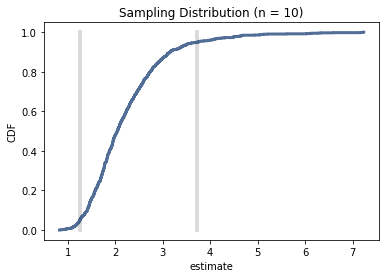

In [34]:
# Simulation of the experiment with a sample size n = 10 from an exponential distribution with λ = 2 and 1000 iterations. plot the sampling distribution.
# Compute the standard error of the estimate and the 90% confidence interval.
# Code below will be modified to complete the tasks:
'''
# Modify functions to reflect lambda = 2, n= 10, and 1000 iterations for an exponential distribution.
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')
'''
# Simulation 1
def SimulateSample1(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter."""
    # Create estimates of 1000 iterations for exponential sample size of 10.
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    # Calculate the standard error
    stderr = RMSE(estimates, lam)
    print('standard error', stderr)
    
    # Create the CDF from the estimates and generate confidence interval.
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    
    # Create VertLine() function for plot.
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=4)
    
    # Apply VertLine() function for lower and upper bounds.    
    VertLine(ci[0])
    VertLine(ci[1])

    # Generate the CDF Plot
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling Distribution (n = 10)')

    return stderr

# Execute the function SimulateSample1().
SimulateSample1()

standard error 0.19697766002171407
confidence interval (1.7111702005528673, 2.3451625656222808)


0.19697766002171407

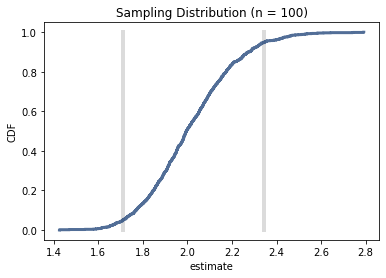

In [35]:
# Simulation 2 (n = 100)
def SimulateSample2(lam=2, n=100, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter."""
    # Create estimates of 1000 iterations for exponential sample size of 100.
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    # Calculate the standard error
    stderr = RMSE(estimates, lam)
    print('standard error', stderr)
    
    # Create the CDF from the estimates and generate confidence interval.
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    
    # Create VertLine() function for plot.
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=4)
    
    # Apply VertLine() function for lower and upper bounds.    
    VertLine(ci[0])
    VertLine(ci[1])

    # Generate the CDF Plot
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling Distribution (n = 100)')

    return stderr

# Execute the function SimulateSample2().
SimulateSample2()

standard error 0.06165593279276246
confidence interval (1.9039097257442466, 2.1135229306757006)


0.06165593279276246

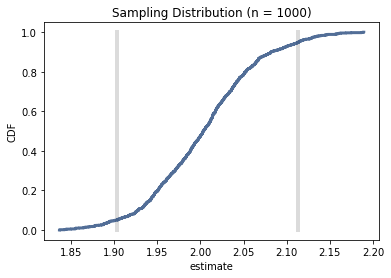

In [36]:
# Simulation 3 (n = 1000)
def SimulateSample3(lam=2, n=1000, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter."""
    # Create estimates of 1000 iterations for exponential sample size of 1000.
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    # Calculate the standard error
    stderr = RMSE(estimates, lam)
    print('standard error', stderr)
    
    # Create the CDF from the estimates and generate confidence interval.
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    
    # Create VertLine() function for plot.
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=4)
    
    # Apply VertLine() function for lower and upper bounds.    
    VertLine(ci[0])
    VertLine(ci[1])

    # Generate the CDF Plot
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling Distribution (n = 1000)')

    return stderr

# Execute the function SimulateSample3().
SimulateSample3()

standard error 0.8132436201859297
confidence interval (1.2590582372533514, 3.6253599233738205)
10 0.8132436201859297
standard error 0.2050898774496176
confidence interval (1.705417330417667, 2.38671498350455)
100 0.2050898774496176
standard error 0.0608290993158719
confidence interval (1.8998796764525365, 2.101321121371842)
1000 0.0608290993158719


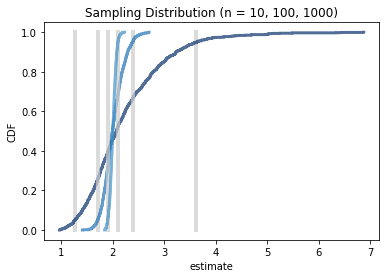

In [68]:
# Calculate the standard error for sample size n and plot side by side.
# Overlay on the same plot to show differences as n increases.
for n in [10, 100, 1000]:
        stderr = SimulateSample1(n=n)
        thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling Distribution (n = 10, 100, 1000)',
                     legend = True)
        print(n, stderr)

#### Exercise 8-2 Conclusions:
The 1000 iterations were performed with sample sizes of 10, 100, and 1000 for the exponential distribution.
1. Standard error and confidence interval range decreased as the number of samples increased per iteration.
2. All the outputs are printed in the code above. The lambda = 2 is within all the confidence intervals.

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [17]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [18]:
# Solution goes here

In [19]:
# Solution goes here